In [9]:
%matplotlib inline
from autograd import numpy as np
import autograd
import matplotlib.pyplot as plt
import mcmc
%load_ext mcmc
%mcmc notebook

The mcmc extension is already loaded. To reload it, use:
  %reload_ext mcmc


In [10]:
def hmc(n_samples, log_pi, grad_log_pi, epsilon, L, q_0):
    res = np.empty((n_samples, q_0.shape[0]))
    
    U = lambda x: -log_pi(x)
    grad_U = lambda x: -grad_log_pi(x)
    
    cur_q = q = q_0
    for i in xrange(n_samples):
        p = np.random.normal(size=q.shape[0])
        cur_p = p
        # half step
        p -= epsilon * grad_U(q) / 2.
        
        # alternate full steps for position and momentum
        for j in xrange(L):
            q += epsilon * p
            if i != L:
                p -= epsilon * grad_U(q)
        
        # now half-step
        p -= epsilon * grad_U(q) / 2.
        
        # negate momentum to make the proposal symmetric
        p = -p
        
        # evaluate potential and kinetic energies at start and end of trajectory
        cur_U = U(cur_q)
        cur_K = np.sum(cur_p**2) / 2.
        new_U = U(q)
        new_K = np.sum(p**2) / 2.
        
        # accept / reject step
        alpha = min(1, np.exp(-new_U + cur_U - new_K + cur_K))
        if np.random.uniform() < alpha:
            res[i,:] = q
            cur_q = q
        else:
            res[i,:] = cur_q
    return res

In [11]:

Sigma = np.array([[1,2], [0,1]])
Sigma = np.dot(Sigma, Sigma.T)
Sigma_inv = np.linalg.inv(Sigma)
def pi(x):
    return -np.dot(np.dot(x, Sigma_inv), x)

samp = mcmc.hmc(1000, pi, 0.1, 10, np.array([0., 0.]))

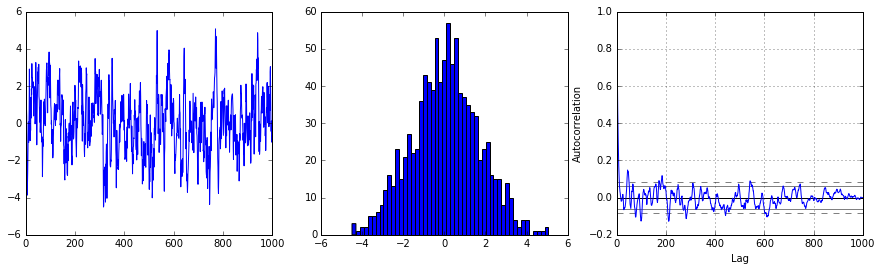

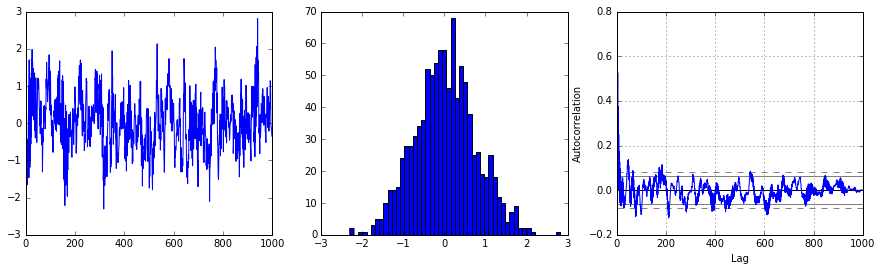

In [12]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(samp[:,0]);
plt.subplot(132)
plt.hist(samp[:,0], 50)
a = plt.subplot(133)
autocorrelation_plot(samp[:,0], a)

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(samp[:,1])
plt.subplot(132)
plt.hist(samp[:,1], 50);
a = plt.subplot(133)
autocorrelation_plot(samp[:,1], a)

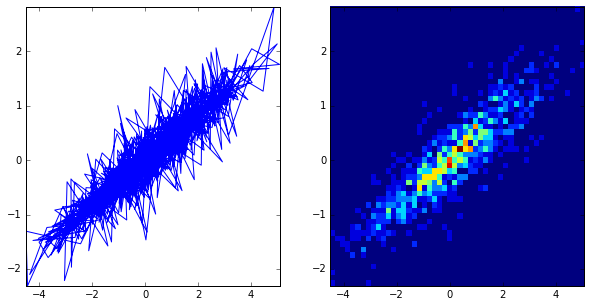

In [13]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.plot(samp[:,0], samp[:,1])
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
plt.hist2d(samp[:,0], samp[:,1], 50);